## Jupyter Notebook Examples for Rust

### Installation Prerequisites

1. In VSCode install the *Jupyter* extension (from Microsoft)
1. From a terminal install:
    1. `cargo install --locked evcxr_jupyter`
    1. `evcxr_jupyter --install`
1. Quit and restart VSCode
1. Create a Jupyter notebook file (with a `.ipynb` extension)
1. Select the kernel `Rust (evcxr)` (near upper right corner of the notebook)

In [2]:
// used to display verbose error messages
:env RUST_BACKTRACE=1
:restart

Set RUST_BACKTRACE=1 (use :restart command to reload child process)
Child process restarted


### Calc and display Fibonacci series

In [3]:
let mut fib = vec![0, 1];
let mut fib_calc = vec![(0,0,0), (1,0,1)];
    
while fib.len() < 20 {
    let n1 = fib[fib.len() - 2];
    let n2 = fib[fib.len() - 1];
    let num = n1 + n2;
    fib.push(num);
    fib_calc.push((num, n1, n2));
}
println!("{:?}\n", fib);


for fc in fib_calc.iter() {
    let (num, n1, n2) = fc;
    println!("{n1} + {n2} = {num}");
}


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]

0 + 0 = 0
0 + 1 = 1
0 + 1 = 1
1 + 1 = 2
1 + 2 = 3
2 + 3 = 5
3 + 5 = 8
5 + 8 = 13
8 + 13 = 21
13 + 21 = 34
21 + 34 = 55
34 + 55 = 89
55 + 89 = 144
89 + 144 = 233
144 + 233 = 377
233 + 377 = 610
377 + 610 = 987
610 + 987 = 1597
987 + 1597 = 2584
1597 + 2584 = 4181


()

### Add some dependencies

In [4]:
:dep image = "0.23.14"
:dep base64 = "0.10.1"

### Helper impls needed to print inline-images in Jupyter cells

In [5]:
extern crate image;
extern crate base64;
use std::fmt::Debug;

pub struct Matrix<T> {pub values: Vec<T>, pub row_size: usize}

impl<T: Debug> Matrix<T> {
    pub fn evcxr_display(&self) {
        let mut html = String::new();
        html.push_str("<table>");
        for r in 0..(self.values.len() / self.row_size) {
            html.push_str("<tr>");
            for c in 0..self.row_size {
                html.push_str("<td>");
                html.push_str(&format!("{:?}", self.values[r * self.row_size + c]));
                html.push_str("</td>");
            }
            html.push_str("</tr>");            
        }
        html.push_str("</table>");
        println!("EVCXR_BEGIN_CONTENT text/html\n{}\nEVCXR_END_CONTENT", html);
    }
}

pub trait EvcxrResult {fn evcxr_display(&self);}

impl EvcxrResult for image::RgbImage {
    fn evcxr_display(&self) {
        let mut buffer = Vec::new();
        image::png::PngEncoder::new(&mut buffer).encode(&**self, self.width(), self.height(), image::ColorType::Rgb8).unwrap();
        let img = base64::encode(&buffer);
        println!("EVCXR_BEGIN_CONTENT image/png\n{}\nEVCXR_END_CONTENT", img);        
    }
}

impl EvcxrResult for image::GrayImage {
    fn evcxr_display(&self) {
        let mut buffer = Vec::new();
        image::png::PngEncoder::new(&mut buffer).encode(&**self, self.width(), self.height(), image::ColorType::L8).unwrap();        
        let img = base64::encode(&buffer);
        println!("EVCXR_BEGIN_CONTENT image/png\n{}\nEVCXR_END_CONTENT", img);        
    }
}

### Print an inline-image (Diver Down flag) from scratch

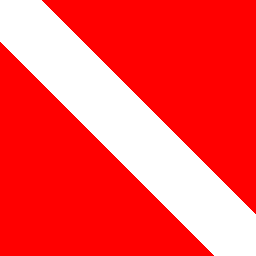

In [6]:
image::ImageBuffer::from_fn(256, 256, |x, y| {
    if (x as i32 - y as i32).abs() < 42 {
        image::Rgb([255, 255, 255])
    } else {
        image::Rgb([255, 0, 0])
    }

})

### Display a 3x3 matrix

In [7]:
// Display a 3x3 matrix
let m3x3 = Matrix {values: vec![1,2,3,4,5,6,7,8,9], row_size: 3};
m3x3

1,2,3
4,5,6
7,8,9


### Display a 4x4 matrix

In [8]:
// Display a 4x4 matrix
let m4x4 = Matrix {values: (0..16).collect(), row_size: 4};
m4x4

0,1,2,3
4,5,6,7
8,9,10,11
12,13,14,15
